In [36]:
# To calculate volatality of the stock for OPtion pricing

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Download daily closing prices of AAPL for one year
ticker = 'AAPL'
data = yf.download(ticker, period='1y')

[*********************100%***********************]  1 of 1 completed


In [39]:
def calculate_measures(data, duration):
    # Calculate returns and drawdown
    returns = data['Adj Close'].pct_change(periods=duration).dropna()
    drawdown = data['Adj Close'].pct_change().dropna().cumsum() - data['Adj Close'].pct_change().dropna().cumsum().cummax()
        # Calculate the sum of sorted returns
    sum_sorted_returns = sum(sorted(returns))

    # Use a conditional expression to avoid division by zero
    if sum_sorted_returns != 0:
        tail_gini_of_losses = sum(sorted(returns)[:int(len(returns) * 0.05)]) / sum_sorted_returns
    else:
        tail_gini_of_losses = None  # or some other default value

    # Define measures
    measures = {   
                   'Standard Deviation': returns.std(),
                   'Mean Absolute Deviation': returns.mad(),
                   'Semi Standard Deviation': returns[returns < 0].std(),
                    'First Lower Partial Moment': returns[returns < 0].mean(),
                    'Second Lower Partial Moment': returns[returns < 0].apply(lambda x: x**2).mean(),
                    'Value at Risk': returns.quantile(0.05),
                    'Conditional Value at Risk': returns[returns <= returns.quantile(0.05)].mean(),
                    'Skewness': skew(returns),
                    'Kurtosis': kurtosis(returns),
                    'Ulcer Index': (drawdown**2).mean()**0.5,
                    'Average Drawdown': drawdown.mean(),
                    'Max Drawdown': drawdown.min(),
                    'Tail Gini of Losses': tail_gini_of_losses
                   # ... rest of the measures ...
                }

    alpha = 0.05
    sorted_returns = sorted(returns)

    # Make sure sorted_returns is not empty and calculate threshold_index
    if sorted_returns:
        threshold_index = int(alpha * len(sorted_returns)) - 1
        threshold_index = max(min(threshold_index, len(sorted_returns) - 1), 0)
        threshold = sorted_returns[threshold_index]
        tail_mean = sum(sorted_returns[:threshold_index]) / max(threshold_index, 1)
        measures['Entropic Value at Risk'] = threshold + (1 / (1 - alpha)) * tail_mean
    else:
        # Handle the case where sorted_returns is empty, if needed
        measures['Entropic Value at Risk'] = None # Or another default value


    return measures


In [40]:
# calcuted risk measures for 1,3,7,14,21 .......251 days window
durations = [1, 3, 7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 90,97,104,111,118,125,132,139,146,
             153,160,167,174,181,188,195,202,209,216,223,230,237,244,251]
results = [calculate_measures(data, d) for d in durations]
df_results = pd.DataFrame(results)
df_results

,Standard Deviation,Mean Absolute Deviation,Semi Standard Deviation,First Lower Partial Moment,Second Lower Partial Moment,Value at Risk,Conditional Value at Risk,Skewness,Kurtosis,Ulcer Index,Average Drawdown,Max Drawdown,Tail Gini of Losses,Entropic Value at Risk
0,0.018239,0.013224,0.011606,-0.013151,0.000307,-0.030274,-0.040060,0.452789,3.229278,0.111829,-0.084502,-0.278399,-3.918392,-0.074669
1,0.030070,0.023062,0.021793,-0.023339,0.001016,-0.055188,-0.072129,-0.418073,0.824803,0.111829,-0.084502,-0.278399,-2.740699,-0.138223
2,0.042495,0.033341,0.029195,-0.035544,0.002107,-0.075375,-0.090893,-0.362279,0.060259,0.111829,-0.084502,-0.278399,-1.291585,-0.175143
3,0.061574,0.049803,0.036212,-0.056197,0.004455,-0.100030,-0.116253,-0.261956,-0.376521,0.111829,-0.084502,-0.278399,-0.624592,-0.229174
4,0.075226,0.061045,0.041635,-0.066980,0.006199,-0.116711,-0.132011,-0.198771,-0.257223,0.111829,-0.084502,-0.278399,-0.370364,-0.262412
5,0.083290,0.068567,0.044009,-0.071217,0.006983,-0.124050,-0.141784,-0.321609,-0.357622,0.111829,-0.084502,-0.278399,-0.258814,-0.277720
6,0.087472,0.074819,0.044907,-0.069577,0.006830,-0.122197,-0.145627,-0.561809,-0.717477,0.111829,-0.084502,-0.278399,-0.178504,-0.287172
7,0.091240,0.079292,0.044463,-0.063943,0.006037,-0.109918,-0.137534,-0.539291,-0.797982,0.111829,-0.084502,-0.278399,-0.134696,-0.262907
8,0.100248,0.087180,0.048726,-0.061452,0.006115,-0.127694,-0.149738,-0.447700,-0.793916,0.111829,-0.084502,-0.278399,-0.125569,-0.293058
9,0.107160,0.094466,0.032923,-0.066945,0.005546,-0.098116,-0.107025,-0.201203,-1.162476,0.111829,-0.084502,-0.278399,-0.068953,-0.213849


In [41]:
#  how to identify volatality for the stock? How?

In [42]:
df_results.describe()

,Standard Deviation,Mean Absolute Deviation,Semi Standard Deviation,First Lower Partial Moment,Second Lower Partial Moment,Value at Risk,Conditional Value at Risk,Skewness,Kurtosis,Ulcer Index,Average Drawdown,Max Drawdown,Tail Gini of Losses,Entropic Value at Risk
count,37.000000,37.000000,26.000000,27.000000,27.000000,37.000000,37.000000,37.000000,37.000000,3.800000e+01,3.800000e+01,3.800000e+01,37.000000,37.000000
mean,0.097699,0.080075,0.038333,-0.057445,0.005891,-0.017809,-0.044612,-0.187739,-0.404672,1.118290e-01,-8.450226e-02,-2.783991e-01,-0.274193,-0.101286
std,0.042502,0.035071,0.017658,0.031619,0.005642,0.103778,0.103000,0.308944,0.770910,1.406408e-17,1.406408e-17,5.625630e-17,0.789790,0.180427
min,0.018239,0.013224,0.010202,-0.120942,0.000052,-0.178952,-0.200370,-0.725007,-1.279873,1.118290e-01,-8.450226e-02,-2.783991e-01,-3.918392,-0.399338
25%,0.061574,0.049803,0.028125,-0.070397,0.001796,-0.109918,-0.137142,-0.418073,-0.750041,1.118290e-01,-8.450226e-02,-2.783991e-01,-0.088543,-0.262907
50%,0.100248,0.082052,0.038487,-0.056197,0.004535,-0.042418,-0.072129,-0.261956,-0.551039,1.118290e-01,-8.450226e-02,-2.783991e-01,-0.019709,-0.138223
75%,0.139739,0.116489,0.047711,-0.033553,0.006907,0.070177,0.044624,0.031409,-0.351127,1.118290e-01,-8.450226e-02,-2.783991e-01,0.001714,0.056686
max,0.158811,0.126357,0.072440,-0.007231,0.019421,0.162400,0.142040,0.452789,3.229278,1.118290e-01,-8.450226e-02,-2.783991e-01,0.026453,0.227893


<Axes: >

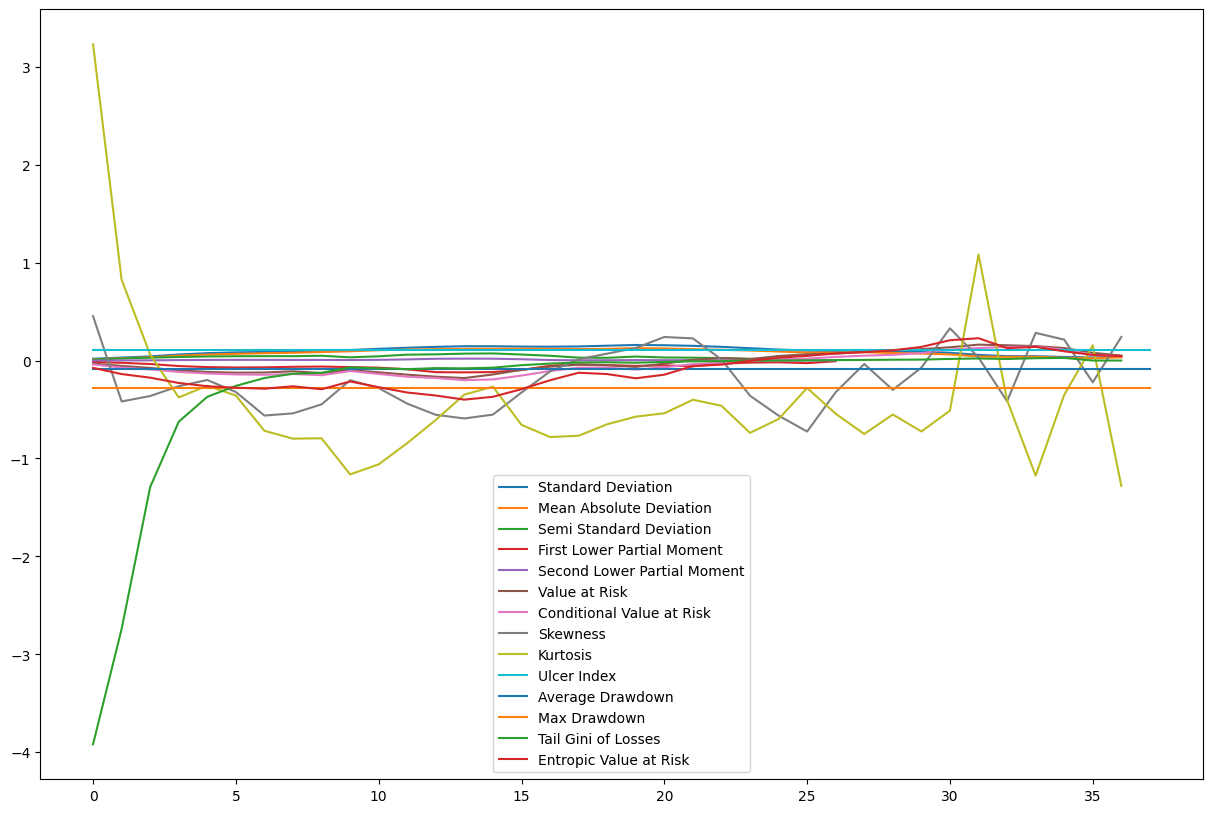

In [44]:
df_results.plot(figsize=(15, 10))

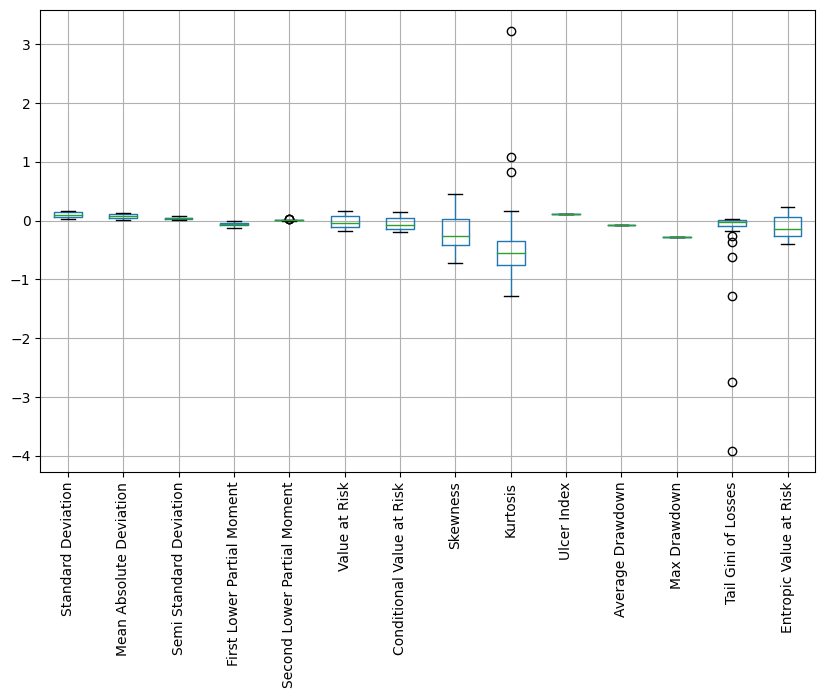

In [53]:
import matplotlib.pyplot as plt
df_results.boxplot(figsize=(10, 6))
plt.xticks(rotation=90) 
plt.show()

<Axes: >

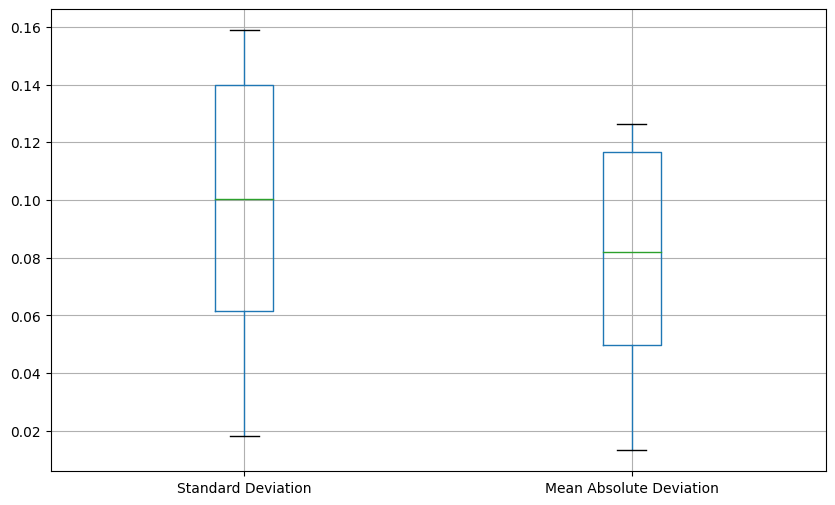

In [47]:
df_results[['Standard Deviation', 'Mean Absolute Deviation']].boxplot(figsize=(10, 6))
